## Import the neccessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./Oil_Price/BrentOilPrices.csv')
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


### Data cleaning, Checking if there are any NAN values

In [3]:
nan_df = df[df.isna().any(axis=1)]
nan_df.tail()

,Date,Price


In [10]:
highest_price = df['Price'].max()
date_highest_price = df['Price'].idxmax()

print("The highest price is", highest_price, "and it occurred on", date_highest_price)



The highest price is 143.95 and it occurred on 5373


In [8]:
 df['Date'].dtype

dtype('O')

In [9]:
df['Date'] = pd.to_datetime(df['Date'])


### Get Only records from 2022

In [11]:
df_2022 = df.loc[df['Date'].dt.year == 2022]
df_2022.head()
 

,Date,Price
8791,2022-01-03,78.25
8792,2022-01-04,79.39
8793,2022-01-05,80.60
8794,2022-01-06,81.99
8795,2022-01-07,82.28


In [85]:
df.reset_index(inplace=True)
df.head()



,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [12]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [83]:
df.rename(columns={'Index': 'Date'}, inplace=True)



In [91]:
df.columns

Index(['Date', 'Price'], dtype='object')

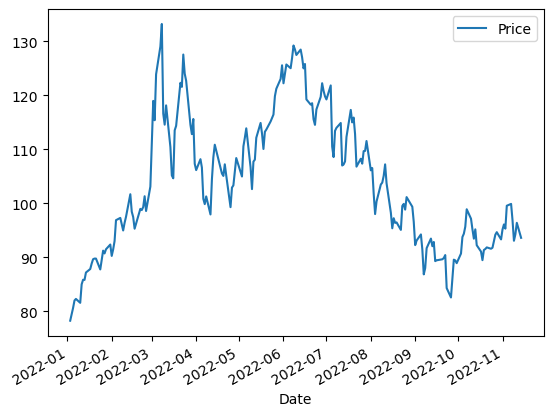

In [13]:
df_2022.plot(x='Date', y='Price', kind='line')
plt.show()


In [31]:
Month = df_2022.groupby('Months').sum()
Month.head()

,Price,Month_Num
Months,,
April,1986.93,76
August,2209.82,176
February,1942.58,40
January,1816.61,21
July,2350.44,147


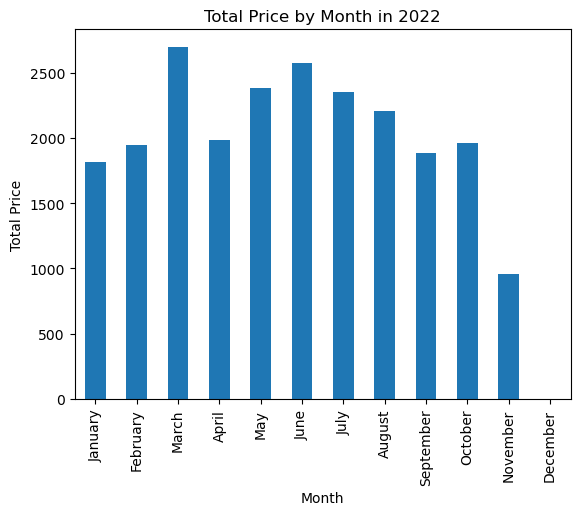

In [30]:
import calendar

# Get the order of months
month_order = list(calendar.month_name)[1:]
 
# Group by month and get the sum
grouped = df_2022.groupby('Months')['Price'].sum().reindex(month_order)

# Create a bar chart
grouped.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Total Price by Month in 2022')
plt.show()



In [32]:
df_2022['Months'] = df_2022['Date'].apply(lambda x: x.strftime('%B'))
df_2022.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_17668\3259336974.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Months'] = df_2022['Date'].apply(lambda x: x.strftime('%B'))


,Date,Price,Months,Month_Num
8791,2022-01-03,78.25,January,1
8792,2022-01-04,79.39,January,1
8793,2022-01-05,80.60,January,1
8794,2022-01-06,81.99,January,1
8795,2022-01-07,82.28,January,1


In [49]:
df['Year'] = df['Date'].apply(lambda x: x.strftime('%Y'))
df.head()

,Date,Price,Year
0,1987-05-20,18.63,1987
1,1987-05-21,18.45,1987
2,1987-05-22,18.55,1987
3,1987-05-25,18.60,1987
4,1987-05-26,18.63,1987


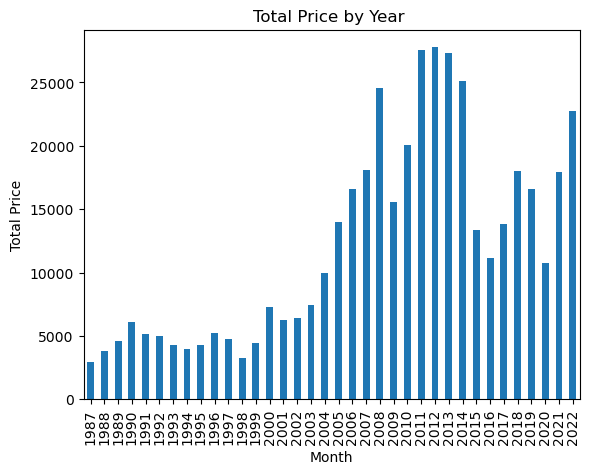

In [53]:
# Group by year and get the sum
Year_data = df.groupby('Year')['Price'].sum()

 # Create a bar chart
Year_data.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Total Price by Year ')
plt.show()